# DSC680 Project 2: Time Series Analysis on South Korea's GDP & Birth Rate by Phil Han

In [1]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from neuralprophet import NeuralProphet

# GDP Analysis and Forecast GDP

In [86]:
# Read the 'World Bank GDP' dataset
df = pd.read_csv('World_Bank_GDP.csv')
df.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Australia,AUS,21853.44999,19681.64503,20290.78042,23705.90722,30819.99349,34460.543,...,68156.3861,62515.31483,56708.9612,49876.71238,53934.15437,57206.99067,54941.06572,51722.069,60444.50236,64491.42989
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Austria,AUT,24625.60072,24558.76368,26527.59309,32294.04886,36889.23351,38417.45779,...,50731.12725,51786.37717,44195.81759,45307.58786,47429.15846,51466.55656,50070.40335,48809.22688,53637.70571,52131.44666
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Belgium,BEL,23098.88651,23015.07126,25006.1914,30655.20927,35429.40779,36809.70134,...,46757.95186,47764.07151,41008.29672,42012.62272,44198.48239,47544.98115,46641.71166,45517.90382,51268.38804,49582.82536
3,GDP per capita (current US$),NY.GDP.PCAP.CD,Brazil,BRA,3726.81142,3142.235528,2824.715396,3056.64968,3623.223905,4773.26848,...,12258.56485,12071.40465,8783.214413,8680.735421,9896.717511,9121.020092,8845.323931,6923.700197,7696.785531,8917.673898
4,GDP per capita (current US$),NY.GDP.PCAP.CD,British Virgin Islands,VGB,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [87]:
df.describe()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
count,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
unique,1,1,48,48,45,45,45,45,45,45,...,46,46,46,47,47,47,47,47,47,44
top,GDP per capita (current US$),NY.GDP.PCAP.CD,Australia,AUS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,48,48,1,1,4,4,4,4,4,4,...,3,3,3,2,2,2,2,2,2,5


In [88]:
# Drop rows where Country Code is not Korea (KOR)
df = df.drop(df[df['Country Code'] != 'KOR'].index)

In [89]:
df.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
24,GDP per capita (current US$),NY.GDP.PCAP.CD,"Korea, Rep.",KOR,12256.99357,11561.24837,13165.06574,14672.85747,16496.12009,19402.50326,...,27182.73431,29249.57522,28732.23108,29288.87044,31616.8434,33436.92306,31902.4169,31721.29802,34997.78164,32254.62472


In [90]:
# Drop columns that are not needed
df = df.drop(['Series Name', 'Series Code', 'Country Name','Country Name','Country Code'], axis=1)

In [91]:
# Rename the the fist column of dataframe to GDP
df = df.rename(columns={'Series Name': 'GDP' })

# Read the GDP dataframe
df.head()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
24,12256.99357,11561.24837,13165.06574,14672.85747,16496.12009,19402.50326,21743.47709,24086.41143,21350.42863,19143.85161,...,27182.73431,29249.57522,28732.23108,29288.87044,31616.8434,33436.92306,31902.4169,31721.29802,34997.78164,32254.62472


In [92]:
# Melt the dataframe
df = df.reset_index().rename(columns={'index':'id'})
df = pd.melt(df, id_vars=['id'], var_name='year', value_name='GDP')
df['year'] = df['year'].str.extract('(\d+)', expand=False).astype(int)

In [93]:
'''
df = df.reset_index().rename(columns={'index':'id'})

df = pd.melt(df, id_vars=['id'], var_name='year', value_name='GDP')
df['year'] = df['year'].str.extract('(\d+)', expand=False).astype(int)

#pivot_table = df.pivot_table(index='id', columns='year', values='value')
#print(pivot_table)
'''

"\ndf = df.reset_index().rename(columns={'index':'id'})\n\ndf = pd.melt(df, id_vars=['id'], var_name='year', value_name='GDP')\ndf['year'] = df['year'].str.extract('(\\d+)', expand=False).astype(int)\n\n#pivot_table = df.pivot_table(index='id', columns='year', values='value')\n#print(pivot_table)\n"

In [94]:
df.head(5)

,id,year,GDP
0,24,2000,12256.99357
1,24,2001,11561.24837
2,24,2002,13165.06574
3,24,2003,14672.85747
4,24,2004,16496.12009


In [95]:
# Change the 'year' column to read as a 'date'
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.strftime('%Y-%m-%d')

In [96]:
# Drop the column for 'id'
df = df.drop(['id'], axis=1)

In [97]:
df.head(30)

,year,GDP
0,2000-01-01,12256.99357
1,2001-01-01,11561.24837
2,2002-01-01,13165.06574
3,2003-01-01,14672.85747
4,2004-01-01,16496.12009
5,2005-01-01,19402.50326
6,2006-01-01,21743.47709
7,2007-01-01,24086.41143
8,2008-01-01,21350.42863
9,2009-01-01,19143.85161


In [98]:
# Swap the columns
df = df[['GDP', 'year']]

In [99]:
df.head()

,GDP,year
0,12256.99357,2000-01-01
1,11561.24837,2001-01-01
2,13165.06574,2002-01-01
3,14672.85747,2003-01-01
4,16496.12009,2004-01-01


In [100]:
# Impute data for missing values
#df['GDP']=df['GDP'].fillna(method='ffill')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GDP     23 non-null     object
 1   year    23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


In [102]:
# Chagne the data type to float and date
df['GDP'] = df['GDP'].astype(float)
df['year'] = pd.to_datetime(df['year'])

In [103]:
# Rename the dataframe with date and sales as 'ds' and 'y', respectively
df = df[["GDP","year"]]
df.rename(columns={"year": "ds","GDP":"y"}, inplace=True)

In [104]:
df.head()

,y,ds
0,12256.99357,2000-01-01
1,11561.24837,2001-01-01
2,13165.06574,2002-01-01
3,14672.85747,2003-01-01
4,16496.12009,2004-01-01


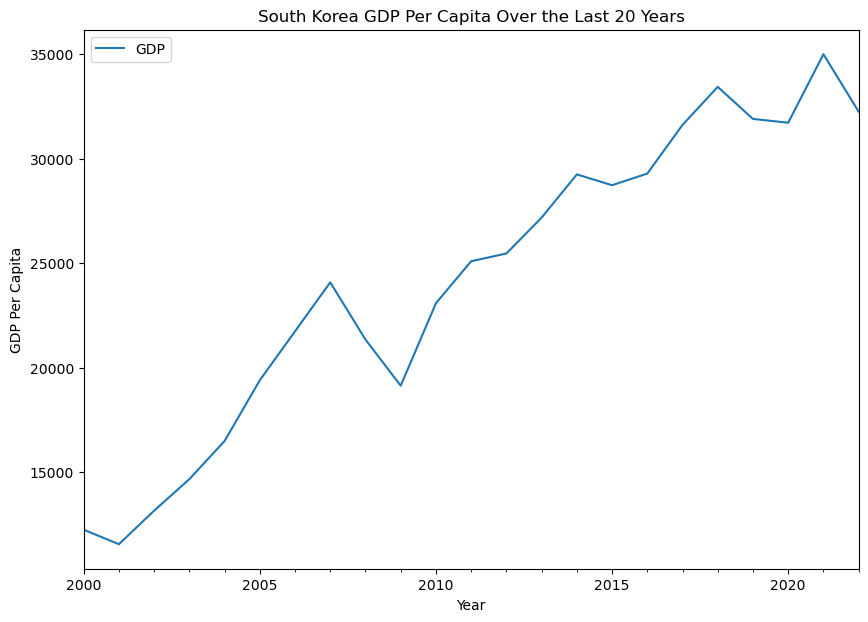

In [105]:
# 1. Plot the date for sales over time
ax = df.set_index('ds').plot(figsize=(10, 7))
ax.set_ylabel('GDP Per Capita')
ax.set_xlabel('Year')
ax.legend(['GDP'])

plt.title("South Korea GDP Per Capita Over the Last 20 Years")
plt.show()

In [106]:
# 2. Split the data into a training and test set.  Use the last year of data (Jan 2022) of data as 
# your test set and the rest as your training set. 
df_train = df[df['ds'] < '2021-01-01']
df_test = df[df['ds'] >= '2021-01-01']

In [107]:
df_test.tail(10)

,y,ds
21,34997.78164,2021-01-01
22,32254.62472,2022-01-01


In [111]:
# 3. Use the training set to build a predictive model for the annual GDP for South Korea 

# Intialize the predictive model with Neural Prophet, using default variables

m = NeuralProphet(yearly_seasonality=True) 

#m = NeuralProphet(trend_reg=0, seasonality_reg = 0.01) 

#yearly_seasonality=True
# Fit the train data and the test data from #2 to the predictive model built w/ Neural Propet
metrics_train = m.fit(df=df_train, freq="Y")
metrics_test = m.test(df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.05E-02, min: 5.66E+00


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.05E-02, min: 2.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.34E-02
Epoch[1000/1000]: 100%|█| 1000/1000 [00:04<00:00, 232.21it/s, SmoothL1Loss=0.001
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 100.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss      MAE     RMSE
1         0.003 1521.286 1579.187


INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000
Epoch[1000/1000]: 100%|█| 1000/1000 [00:04<00:00, 232.58it/s, SmoothL1Loss=0.002
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_uti

Text(0.5, 1.0, 'South Korea GDP Forecast')

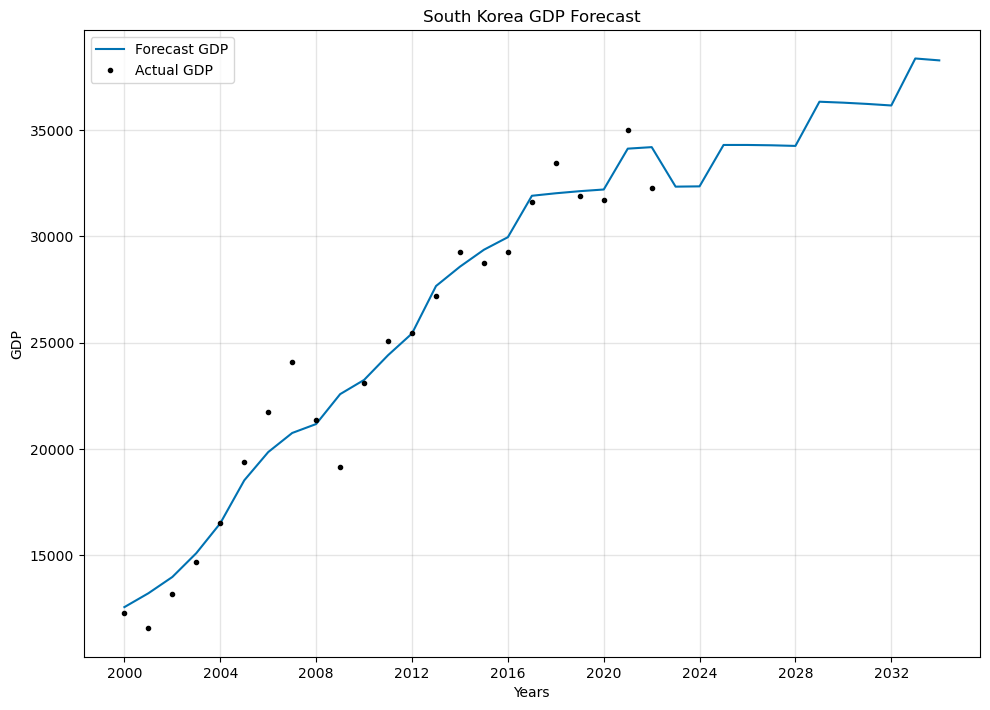

In [112]:
# 4. Use the model to predict the annual GDP on the last year of data 2021
m = NeuralProphet(trend_reg=0, seasonality_reg = 0.01, seasonality_mode="multiplicative", learning_rate=0.1)
metrics_train2 = m.fit(df=df_train, freq="Y")
future = m.make_future_dataframe(df, periods=12, n_historic_predictions=96)
forecast = m.predict(future)

#fig.legend(['Forecast GDP','Actual GDP'])
fig, ax = plt.subplots(figsize=(10,7))
m.plot(forecast, xlabel="Years", ylabel="GDP", ax=ax)
ax.legend(['Forecast GDP','Actual GDP'])
plt.title('South Korea GDP Forecast')

In [113]:
metrics_train.tail(10)

,SmoothL1Loss,MAE,RMSE,RegLoss
990,0.001469,830.607192,1098.037034,0.0
991,0.001469,830.623564,1085.997387,0.0
992,0.001469,830.630255,1097.367815,0.0
993,0.001469,830.642630,1093.549822,0.0
994,0.001469,830.651550,1090.131978,0.0
995,0.001469,830.660255,1071.867257,0.0
996,0.001469,830.661034,1083.641073,0.0
997,0.001469,830.662903,1101.490281,0.0
998,0.001469,830.665507,1074.425523,0.0
999,0.001469,830.665731,1102.599755,0.0


In [114]:
# Make future GDP forecast dataframe
future = m.make_future_dataframe(df, periods=24, n_historic_predictions=96)
forecast = m.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 96 historic forecasts, reduced to 23.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/li

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,12256.99357,12555.623047,298.629477,15917.672852,-0.771745
1,2001-01-01,11561.24837,13207.658203,1646.409833,18326.490234,-0.756637
2,2002-01-01,13165.06574,13973.865234,808.799494,21686.101562,-0.761713
3,2003-01-01,14672.85747,15094.539062,421.681592,26709.443359,-0.766752
4,2004-01-01,16496.12009,16498.652344,2.532254,33192.343750,-0.771745
5,2005-01-01,19402.50326,18521.679688,-880.823573,40162.265625,-0.756637
6,2006-01-01,21743.47709,19851.097656,-1892.379434,46350.656250,-0.761713
7,2007-01-01,24086.41143,20749.222656,-3337.188774,50952.632812,-0.766752
8,2008-01-01,21350.42863,21170.164062,-180.264567,53658.554688,-0.771745
9,2009-01-01,19143.85161,22577.646484,3433.794874,56828.585938,-0.756637


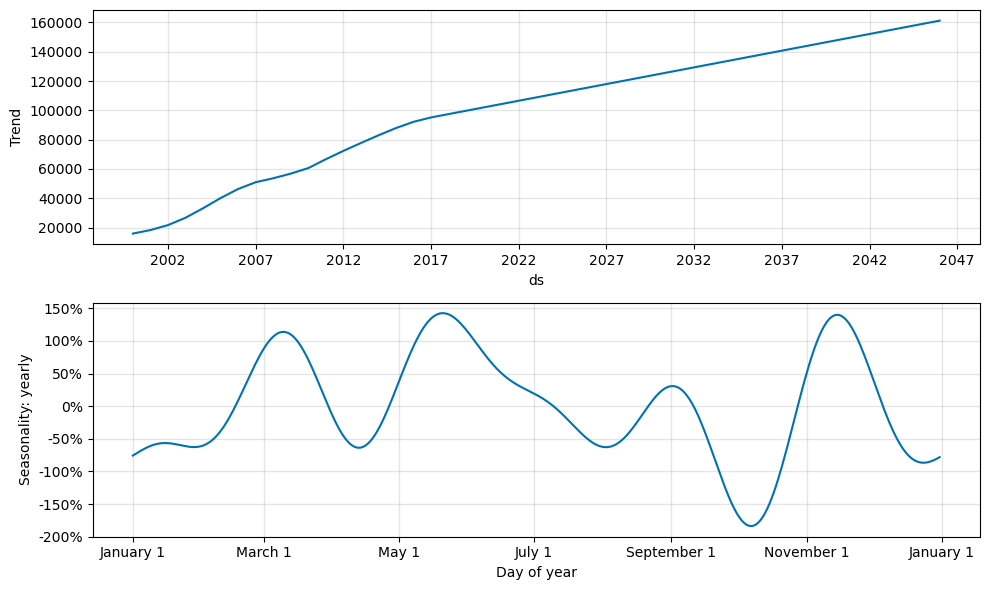

In [115]:
# 4a. Show the seasonality as a percent of the trend
fig_param = m.plot_components(forecast)

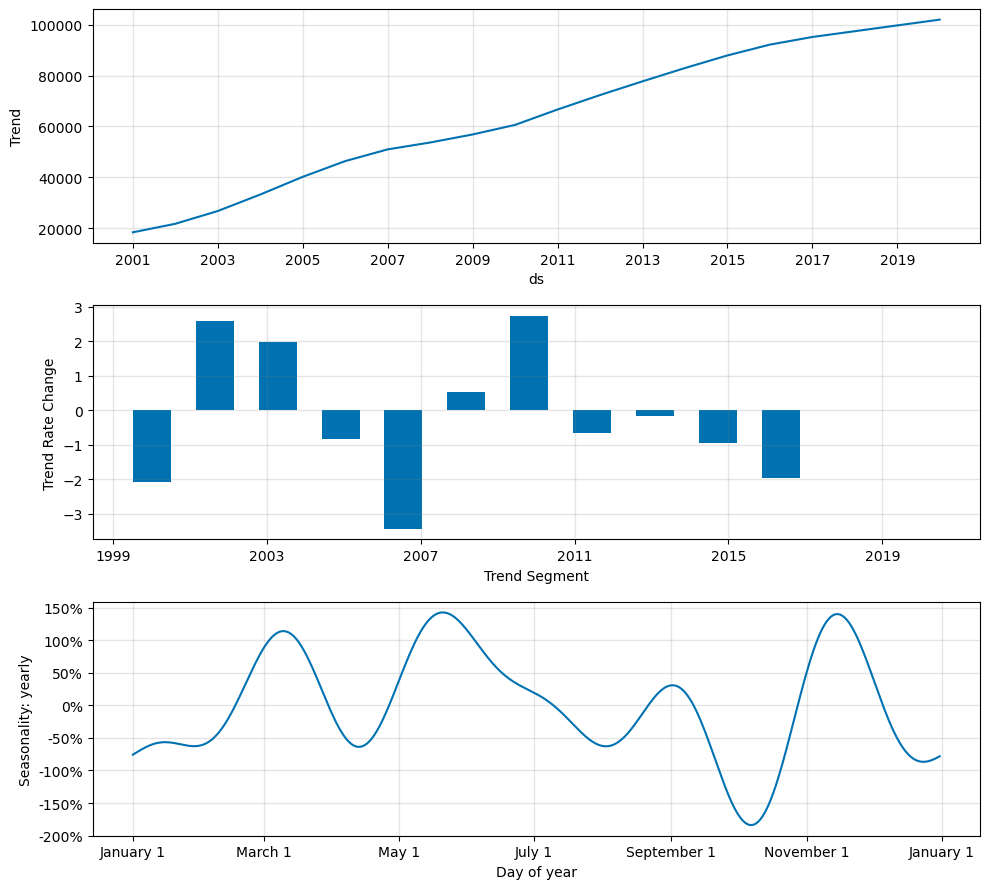

In [116]:
# Visualize the model parameters
fig_model = m.plot_parameters()

In [117]:
# 5. Report the RMSE of the model predictions on the test set
metrics_test

,SmoothL1Loss,MAE,RMSE
0,0.003014,1521.286133,1579.187012


In [118]:
# Save the GDP forecast/prediction as a csv file
df_GDP = forecast

path = "/Users/philshan/Documents/GitHub/DSC680/ROK_GDP_Forecast.csv"

df_GDP.to_csv(path, index=False)

## South Korea's Birth Rate Analysis and Forecast

In [119]:
# Read the 'World Bank GDP' dataset
df_birth = pd.read_csv('World_Bank_Birthrate.csv')
df_birth.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Australia,AUS,1.756,1.739,1.756,1.748,1.768,1.807,...,1.855,1.826,1.814,1.752,1.741,1.74,1.657,1.581,1.7,..
1,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Austria,AUT,1.36,1.33,1.39,1.38,1.42,1.41,...,1.44,1.46,1.49,1.53,1.52,1.47,1.46,1.44,1.48,..
2,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Belgium,BEL,1.67,1.67,1.65,1.67,1.72,1.76,...,1.76,1.74,1.7,1.68,1.65,1.62,1.6,1.55,1.6,..
3,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Brazil,BRA,2.255,2.183,2.103,2.023,2.002,1.974,...,1.748,1.767,1.777,1.709,1.736,1.749,1.703,1.649,1.641,..
4,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,British Virgin Islands,VGB,1.866,1.505,1.24,1.306,1.505,1.341,...,1.08,1.237,1.186,0.987,0.872,0.917,0.948,0.976,1.005,..


In [120]:
# Drop rows where Country Code is not Korea (KOR)
df_birth = df_birth.drop(df_birth[df_birth['Country Code'] != 'KOR'].index)

In [121]:
df_birth.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
24,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,"Korea, Rep.",KOR,1.48,1.309,1.178,1.191,1.164,1.085,...,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,..


In [122]:
# Drop columns that are not needed
df_birth = df_birth.drop(['Series Name', 'Series Code', 'Country Name','Country Code'], axis=1)

In [123]:
# Rename the the fist column of dataframe to GDP
df_birth = df_birth.rename(columns={'Series Name': 'Birthrate' })

In [124]:
# Read the GDP dataframe
df_birth.head()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
24,1.48,1.309,1.178,1.191,1.164,1.085,1.132,1.259,1.192,1.149,...,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,..


In [125]:
# Melt the dataframe
df_birth = df_birth.reset_index().rename(columns={'index':'id'})
df_birth = pd.melt(df_birth, id_vars=['id'], var_name='year', value_name='Birth')
df_birth['year'] = df_birth['year'].str.extract('(\d+)', expand=False).astype(int)

In [126]:
# Check the new dataframe for birthrate
df_birth.head(25)

,id,year,Birth
0,24,2000,1.48
1,24,2001,1.309
2,24,2002,1.178
3,24,2003,1.191
4,24,2004,1.164
5,24,2005,1.085
6,24,2006,1.132
7,24,2007,1.259
8,24,2008,1.192
9,24,2009,1.149


In [127]:
# Change the 'year' column to read as a 'date'
df_birth['year'] = pd.to_datetime(df_birth['year'], format='%Y')
df_birth['year'] = df_birth['year'].dt.strftime('%Y-%m-%d')

In [128]:
# Drop the column for 'id'
df_birth = df_birth.drop(['id'], axis=1)

In [129]:
df_birth.tail(5)

,year,Birth
18,2018-01-01,0.977
19,2019-01-01,0.918
20,2020-01-01,0.837
21,2021-01-01,0.808
22,2022-01-01,..


In [130]:
df_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    23 non-null     object
 1   Birth   23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


In [131]:
df_birth['Birth'].str.replace(r'\..','0').astype(float)
df_birth.tail()

WARNING - (py.warnings._showwarnmsg) - /var/folders/dq/pk6vhlb94kl10cjryr47z9sw0000gn/T/ipykernel_11171/734646817.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_birth['Birth'].str.replace(r'\..','0').astype(float)



,year,Birth
18,2018-01-01,0.977
19,2019-01-01,0.918
20,2020-01-01,0.837
21,2021-01-01,0.808
22,2022-01-01,..


In [132]:
# Chagne the data type to float and date
df_birth['Birth'] = pd.to_numeric(df_birth['Birth'], errors='coerce')
df_birth['year'] = pd.to_datetime(df_birth['year'])

In [133]:
df_birth.tail()

,year,Birth
18,2018-01-01,0.977
19,2019-01-01,0.918
20,2020-01-01,0.837
21,2021-01-01,0.808
22,2022-01-01,NaN


In [134]:
# Fill the NaN with the value before the last
df_birth['Birth']=df_birth['Birth'].fillna(method='ffill')

In [135]:
df_birth.tail()

,year,Birth
18,2018-01-01,0.977
19,2019-01-01,0.918
20,2020-01-01,0.837
21,2021-01-01,0.808
22,2022-01-01,0.808


In [136]:
df_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    23 non-null     datetime64[ns]
 1   Birth   23 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 496.0 bytes


In [137]:
# Rename the dataframe with date and sales as 'ds' and 'y', respectively
df_birth = df_birth[["Birth","year"]]
df_birth.rename(columns={"year": "ds","Birth":"y"}, inplace=True)

In [138]:
df_birth.head()

,y,ds
0,1.480,2000-01-01
1,1.309,2001-01-01
2,1.178,2002-01-01
3,1.191,2003-01-01
4,1.164,2004-01-01


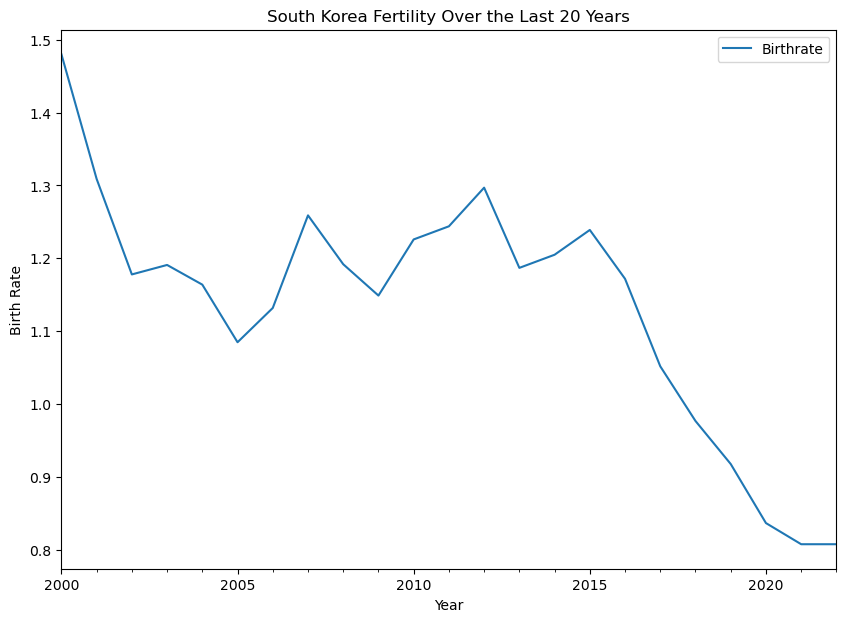

In [139]:
# 1. Plot the date for sales over time
ax = df_birth.set_index('ds').plot(figsize=(10, 7))
ax.set_ylabel('Birth Rate')
ax.set_xlabel('Year')
ax.legend(['Birthrate'])

plt.title("South Korea Fertility Over the Last 20 Years")
plt.show()

In [140]:
# 2a. Split the data into a training and test set.  Use the last year of data (Jan 2022) of data as 
# your test set and the rest as your training set. 
df_train1 = df_birth[df_birth['ds'] < '2021-01-01']
df_test1 = df_birth[df_birth['ds'] >= '2021-01-01']

In [141]:
df_test1.head(30)

,y,ds
21,0.808,2021-01-01
22,0.808,2022-01-01


In [142]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 21 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       2 non-null      float64       
 1   ds      2 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 48.0 bytes


In [144]:
# 3a. Use the training set to build a predictive model for the annual Birthrate for South Korea 

# Intialize the predictive model with Neural Prophet, using default variables
m = NeuralProphet(
yearly_seasonality=True)  

# Fit the train data and the test data from #2 to the predictive model built w/ Neural Propet
metrics_train = m.fit(df=df_train1, freq="Y")
metrics_test = m.test(df=df_test1)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.82E-01, min: 4.11E-02


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.05E+01, min: 4.11E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.96E-01
Epoch[1000/1000]: 100%|█| 1000/1000 [00:04<00:00, 230.36it/s, SmoothL1Loss=0.000
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 100.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.054  0.152  0.156


INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000
Epoch[1000/1000]: 100%|█| 1000/1000 [00:04<00:00, 227.29it/s, SmoothL1Loss=0.000
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_uti

Text(0.5, 1.0, 'South Korea Birth Rate Forecast')

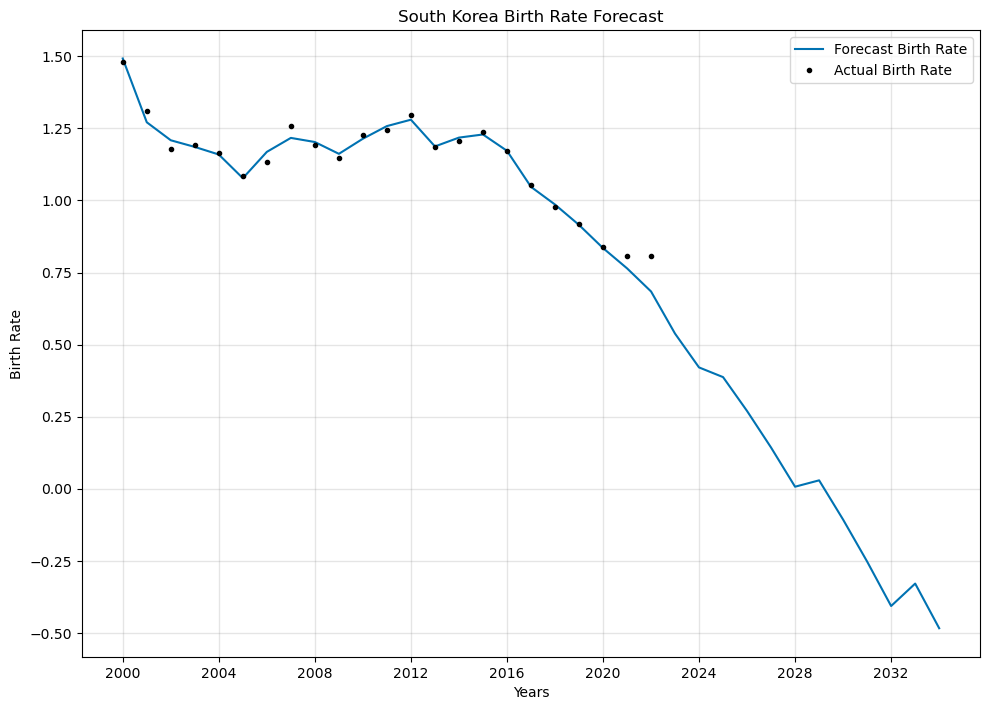

In [145]:
# 4a. Use the model to predict the annual Birthrate on the last year of data 2021
m = NeuralProphet(trend_reg=0, seasonality_reg = 0.01, seasonality_mode="multiplicative", learning_rate=0.1)
metrics_train2 = m.fit(df=df_train1, freq="Y")
future = m.make_future_dataframe(df_birth, periods=12, n_historic_predictions=96)
forecast = m.predict(future)

#fig.legend(['Forecast Birthrate','Actual Birthrate'])
fig, ax = plt.subplots(figsize=(10,7))
m.plot(forecast, xlabel="Years", ylabel="Birth Rate", ax=ax)
ax.legend(['Forecast Birth Rate','Actual Birth Rate'])
plt.title('South Korea Birth Rate Forecast')

In [146]:
metrics_train.tail(10)

,SmoothL1Loss,MAE,RMSE,RegLoss
990,0.000801,0.014857,0.018890,0.0
991,0.000801,0.014855,0.018715,0.0
992,0.000801,0.014853,0.018292,0.0
993,0.000801,0.014853,0.018732,0.0
994,0.000800,0.014852,0.018747,0.0
995,0.000800,0.014854,0.018885,0.0
996,0.000800,0.014852,0.018883,0.0
997,0.000800,0.014852,0.018558,0.0
998,0.000800,0.014852,0.018716,0.0
999,0.000800,0.014852,0.018836,0.0


In [147]:
# Make future birthrate forecast dataframe
future1 = m.make_future_dataframe(df_birth, periods=24, n_historic_predictions=96)
forecast1 = m.predict(future1)
forecast1

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 96 historic forecasts, reduced to 23.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/li

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,1.480,1.492717,0.012717,1.000970,2.999003
1,2001-01-01,1.309,1.271325,-0.037675,0.967370,2.331482
2,2002-01-01,1.178,1.208884,0.030884,0.941618,2.554677
3,2003-01-01,1.191,1.185814,-0.005186,0.929347,2.777213
4,2004-01-01,1.164,1.159503,-0.004497,0.917646,2.999003
5,2005-01-01,1.085,1.077404,-0.007596,0.909161,2.331482
6,2006-01-01,1.132,1.168643,0.036643,0.930298,2.554677
7,2007-01-01,1.259,1.217132,-0.041868,0.937638,2.777213
8,2008-01-01,1.192,1.202869,0.010869,0.928490,2.999003
9,2009-01-01,1.149,1.161875,0.012875,0.934517,2.331482


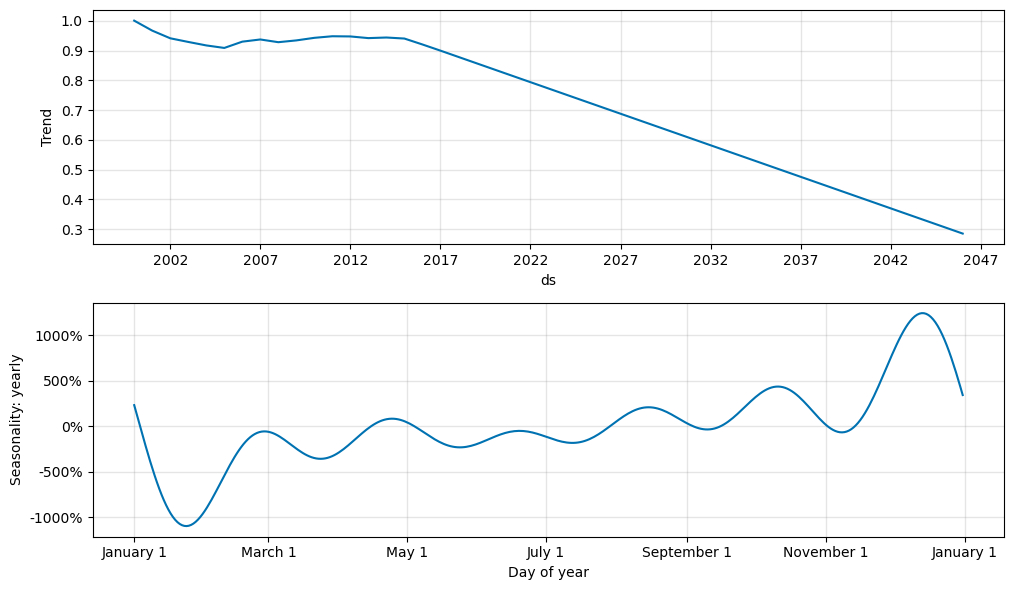

In [148]:
# 4a. Show the seasonality as a percent of the trend
fig_param = m.plot_components(forecast1)

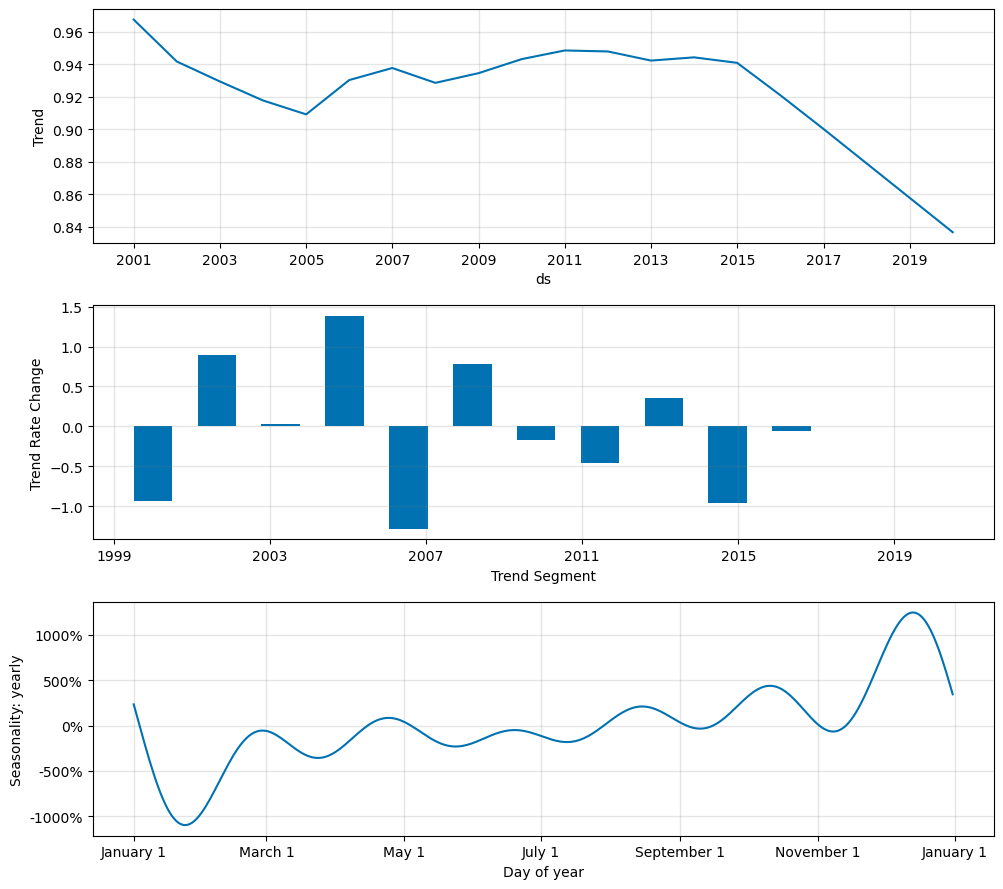

In [149]:
# Visualize the model parameters
fig_model = m.plot_parameters()

In [150]:
# 5a. Report the RMSE of the model predictions on the test set
metrics_test

,SmoothL1Loss,MAE,RMSE
0,0.05445,0.15229,0.15576


In [151]:
# Save the birthrate forecast/prediction as a csv file
df_birth1 = forecast1

path = "/Users/philshan/Documents/GitHub/DSC680/ROK_Birthrate_Forecast.csv"

df_birth1.to_csv(path, index=False)

In [152]:
'''
# save predictions to a csv in google drive
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/GDP_forecast.csv'
'''

"\n# save predictions to a csv in google drive\nfrom google.colab import drive\n\ndrive.mount('/content/drive')\npath = '/content/drive/My Drive/GDP_forecast.csv'\n"

In [153]:
# Read the new prediction 'World Bank GDP' dataset
gdp_df = pd.read_csv('ROK_GDP_Forecast.csv')
gdp_df.head(100)

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,12256.99357,12555.623047,298.629477,15917.672852,-0.771745
1,2001-01-01,11561.24837,13207.658203,1646.409833,18326.490234,-0.756637
2,2002-01-01,13165.06574,13973.865234,808.799494,21686.101562,-0.761713
3,2003-01-01,14672.85747,15094.539062,421.681592,26709.443359,-0.766752
4,2004-01-01,16496.12009,16498.652344,2.532254,33192.343750,-0.771745
5,2005-01-01,19402.50326,18521.679688,-880.823573,40162.265625,-0.756637
6,2006-01-01,21743.47709,19851.097656,-1892.379434,46350.656250,-0.761713
7,2007-01-01,24086.41143,20749.222656,-3337.188774,50952.632812,-0.766752
8,2008-01-01,21350.42863,21170.164062,-180.264567,53658.554688,-0.771745
9,2009-01-01,19143.85161,22577.646484,3433.794874,56828.585938,-0.756637


In [154]:
# Change the columns heads for the new GDP dataset
gdp_df.rename({'y': 'GDP','yhat1':'pred_GDP'}, axis= "columns", inplace = True)

In [155]:
# Check the new headers for the new GDP dataset 
gdp_df.head()

,ds,GDP,pred_GDP,residual1,trend,season_yearly
0,2000-01-01,12256.99357,12555.623047,298.629477,15917.672852,-0.771745
1,2001-01-01,11561.24837,13207.658203,1646.409833,18326.490234,-0.756637
2,2002-01-01,13165.06574,13973.865234,808.799494,21686.101562,-0.761713
3,2003-01-01,14672.85747,15094.539062,421.681592,26709.443359,-0.766752
4,2004-01-01,16496.12009,16498.652344,2.532254,33192.343750,-0.771745


In [156]:
# Read the new prediction 'World Bank Birthrate' dataset
br_df = pd.read_csv('ROK_Birthrate_Forecast.csv')
br_df.head(120)

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,1.480,1.492717,0.012717,1.000970,2.999003
1,2001-01-01,1.309,1.271325,-0.037675,0.967370,2.331482
2,2002-01-01,1.178,1.208884,0.030884,0.941618,2.554677
3,2003-01-01,1.191,1.185814,-0.005186,0.929347,2.777213
4,2004-01-01,1.164,1.159503,-0.004497,0.917646,2.999003
5,2005-01-01,1.085,1.077404,-0.007596,0.909161,2.331482
6,2006-01-01,1.132,1.168643,0.036643,0.930298,2.554677
7,2007-01-01,1.259,1.217132,-0.041868,0.937638,2.777213
8,2008-01-01,1.192,1.202869,0.010869,0.928490,2.999003
9,2009-01-01,1.149,1.161875,0.012875,0.934517,2.331482


In [157]:
# Change the columns heads for the new birthrate dataset
br_df.rename({'y': 'birth_rate','yhat1':'pred_birth_rate'}, axis= "columns", inplace = True)
br_df.head()

,ds,birth_rate,pred_birth_rate,residual1,trend,season_yearly
0,2000-01-01,1.480,1.492717,0.012717,1.000970,2.999003
1,2001-01-01,1.309,1.271325,-0.037675,0.967370,2.331482
2,2002-01-01,1.178,1.208884,0.030884,0.941618,2.554677
3,2003-01-01,1.191,1.185814,-0.005186,0.929347,2.777213
4,2004-01-01,1.164,1.159503,-0.004497,0.917646,2.999003


In [158]:
# Merge the new GDP ("gdp_df") dataset with the new Birthrate ()"br_df) dataset
new_df = pd.merge(gdp_df, br_df, on='ds')

In [159]:
# Check the new 'merged' dataset called 'new_df'
new_df.head(120)

,ds,GDP,pred_GDP,residual1_x,trend_x,season_yearly_x,birth_rate,pred_birth_rate,residual1_y,trend_y,season_yearly_y
0,2000-01-01,12256.99357,12555.623047,298.629477,15917.672852,-0.771745,1.480,1.492717,0.012717,1.000970,2.999003
1,2001-01-01,11561.24837,13207.658203,1646.409833,18326.490234,-0.756637,1.309,1.271325,-0.037675,0.967370,2.331482
2,2002-01-01,13165.06574,13973.865234,808.799494,21686.101562,-0.761713,1.178,1.208884,0.030884,0.941618,2.554677
3,2003-01-01,14672.85747,15094.539062,421.681592,26709.443359,-0.766752,1.191,1.185814,-0.005186,0.929347,2.777213
4,2004-01-01,16496.12009,16498.652344,2.532254,33192.343750,-0.771745,1.164,1.159503,-0.004497,0.917646,2.999003
5,2005-01-01,19402.50326,18521.679688,-880.823573,40162.265625,-0.756637,1.085,1.077404,-0.007596,0.909161,2.331482
6,2006-01-01,21743.47709,19851.097656,-1892.379434,46350.656250,-0.761713,1.132,1.168643,0.036643,0.930298,2.554677
7,2007-01-01,24086.41143,20749.222656,-3337.188774,50952.632812,-0.766752,1.259,1.217132,-0.041868,0.937638,2.777213
8,2008-01-01,21350.42863,21170.164062,-180.264567,53658.554688,-0.771745,1.192,1.202869,0.010869,0.928490,2.999003
9,2009-01-01,19143.85161,22577.646484,3433.794874,56828.585938,-0.756637,1.149,1.161875,0.012875,0.934517,2.331482


In [160]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ds               47 non-null     object 
 1   GDP              23 non-null     float64
 2   pred_GDP         47 non-null     float64
 3   residual1_x      23 non-null     float64
 4   trend_x          47 non-null     float64
 5   season_yearly_x  47 non-null     float64
 6   birth_rate       23 non-null     float64
 7   pred_birth_rate  47 non-null     float64
 8   residual1_y      23 non-null     float64
 9   trend_y          47 non-null     float64
 10  season_yearly_y  47 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.4+ KB


In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix

In [162]:
# Figure 1-Scatter plot with regression betweein GDP_Predict and Birthrate_Predict
#sns.lmplot(x='GDP', y='birth', data=new_df).set(title='A Scatter Chart with Regression Between GDP and Birth')

In [163]:
new_df.head(5)

,ds,GDP,pred_GDP,residual1_x,trend_x,season_yearly_x,birth_rate,pred_birth_rate,residual1_y,trend_y,season_yearly_y
0,2000-01-01,12256.99357,12555.623047,298.629477,15917.672852,-0.771745,1.480,1.492717,0.012717,1.000970,2.999003
1,2001-01-01,11561.24837,13207.658203,1646.409833,18326.490234,-0.756637,1.309,1.271325,-0.037675,0.967370,2.331482
2,2002-01-01,13165.06574,13973.865234,808.799494,21686.101562,-0.761713,1.178,1.208884,0.030884,0.941618,2.554677
3,2003-01-01,14672.85747,15094.539062,421.681592,26709.443359,-0.766752,1.191,1.185814,-0.005186,0.929347,2.777213
4,2004-01-01,16496.12009,16498.652344,2.532254,33192.343750,-0.771745,1.164,1.159503,-0.004497,0.917646,2.999003


In [164]:
#new_df['ds'] = pd.to_datetime(new_df['ds'])

In [165]:
#new_df['ds'] = pd.to_datetime(new_df['ds']).astype(int) / 10**9

In [166]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ds               47 non-null     object 
 1   GDP              23 non-null     float64
 2   pred_GDP         47 non-null     float64
 3   residual1_x      23 non-null     float64
 4   trend_x          47 non-null     float64
 5   season_yearly_x  47 non-null     float64
 6   birth_rate       23 non-null     float64
 7   pred_birth_rate  47 non-null     float64
 8   residual1_y      23 non-null     float64
 9   trend_y          47 non-null     float64
 10  season_yearly_y  47 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.4+ KB


In [167]:
'''
from sklearn.impute import KNNImputer

# create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=5)

# perform KNN imputation on the dataframe
#new_df[['GDP','residual1_x','birth','residual1_y']] = imputer.fit_transform(new_df[['GDP','residual1_x','birth','residual1_y']])
imputed_df = imputer.fit_transform(new_df)
'''

"\nfrom sklearn.impute import KNNImputer\n\n# create an instance of the KNNImputer class\nimputer = KNNImputer(n_neighbors=5)\n\n# perform KNN imputation on the dataframe\n#new_df[['GDP','residual1_x','birth','residual1_y']] = imputer.fit_transform(new_df[['GDP','residual1_x','birth','residual1_y']])\nimputed_df = imputer.fit_transform(new_df)\n"

In [168]:
#new_df.head(100)

In [169]:
'''
new_df = pd.DataFrame(imputed_df)
new_df.head(100)
'''

'\nnew_df = pd.DataFrame(imputed_df)\nnew_df.head(100)\n'

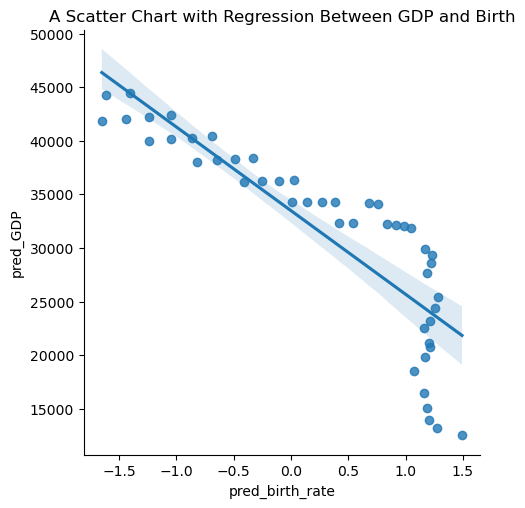

In [170]:
# Figure 1-Scatter plot with regression betweein GDP_Predict and Birthrate_Predict
sns.lmplot(x='pred_birth_rate', y='pred_GDP', data=new_df).set(title='A Scatter Chart with Regression Between GDP and Birth')

Text(0.5, 1.0, 'Correlation Heatmap Between GDP and Birth Rate')

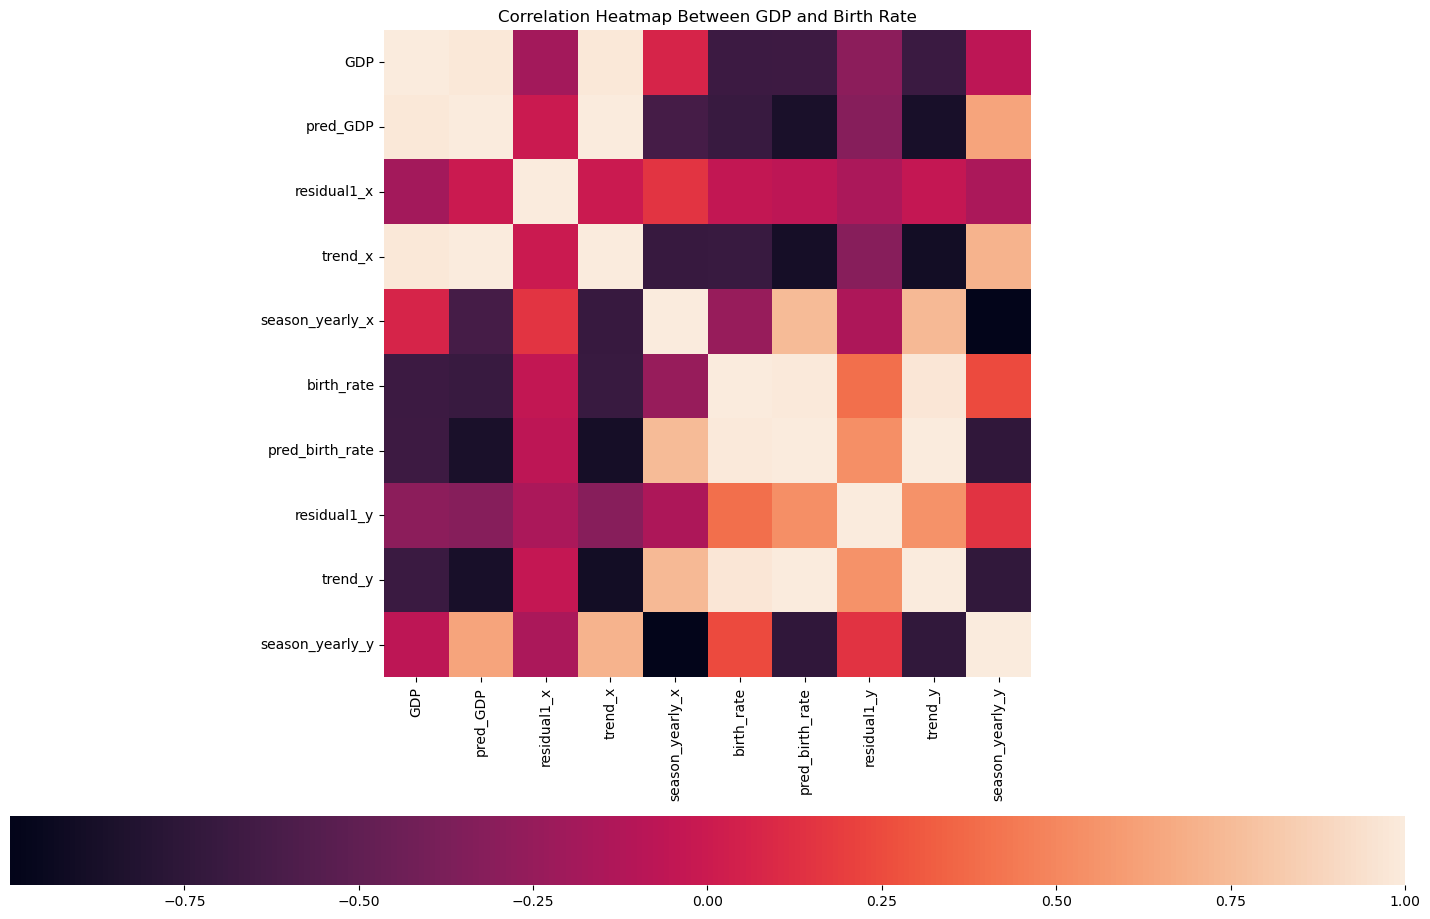

In [171]:
# Create a correlation heatmap, Figure 4.
fig, ax=plt.subplots(figsize=(18,12))

sns.heatmap(new_df.corr(), cbar_kws={'orientation':'horizontal'}, square=True)
plt.title("Correlation Heatmap Between GDP and Birth Rate")

In [172]:
# The Ordinary Least Squares (OLS) Regression Analysis 

import pandas as pd
import numpy as np
import statsmodels.api as sm


X = new_df['pred_birth_rate']
y = new_df['pred_GDP']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               pred_GDP   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     127.7
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           9.90e-15
Time:                        13:27:27   Log-Likelihood:                -462.32
No. Observations:                  47   AIC:                             928.6
Df Residuals:                      45   BIC:                             932.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             3.35e+04    699.040     

### This is an OLS regression result. It is a statistical method that estimates the relationship between one or more independent variables and a dependent variable. 

The model has an R-squared value of 0.739 which means that 73.9% of the variation in the dependent variable (pred_GDP) is explained by the independent variable (pred_birth_rate). The adjusted R-squared value is 0.734 which is slightly lower than the R-squared value but still indicates that the model is a good fit for the data.

The F-statistic is 127.7 and its associated probability is 9.90e-15 which means that there is strong evidence against the null hypothesis, i.e., at least one of the coefficients in the model is not zero.

The coefficient for pred_birth_rate is -7798.2666 with a standard error of 690.196 and a t-value of -11.299. The p-value associated with this t-value is less than 0.05 which means that we can reject the null hypothesis that there is no relationship between pred_birth_rate and pred_GDP.

The constant term (intercept) has a coefficient of 3.35e+04 with a standard error of 699.040 and a t-value of 47.924. The p-value associated with this t-value is less than 0.05 which means that we can reject the null hypothesis that there is no relationship between the constant term and pred_GDP.